<a href="https://colab.research.google.com/github/DominyRonin/GPR-DDS/blob/main/New%20SRS%20GPR_VGG16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mout Google **Drive** 


> To load Dataset  


*   For training
*   For validation
*   For testing 


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install the Dependencies
#!pip install kaggle
#!pip uninstall tensorflow
#!pip install tensorflow

In [36]:
from google.colab import files
import os

print("project's folder : ")
os.chdir('/content/drive/My Drive/New Data')
!pwd


project's folder : 
/content/drive/My Drive/New Data


# ***Install  prequest packages***

In [37]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from pathlib import Path
from keras import  backend as k
from keras.layers import Activation
from keras.models import Model
from keras.applications import vgg16
from keras.optimizers import Adam, Adamax
from keras.metrics import categorical_crossentropy
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib inline
 
print("Pacakages added ")

Pacakages added 


## **Path to Dataset for training , validation and testing**

In [38]:
train_path = Path('/content/drive/My Drive/New Data/Data2/train2')
test_path =  Path('/content/drive/My Drive/New Data/Data2/test2')
valid_path = Path('/content/drive/My Drive/New Data/Data2/validate2')

print(train_path)
print(valid_path)
print(test_path)

/content/drive/My Drive/New Data/Data2/train2
/content/drive/My Drive/New Data/Data2/validate2
/content/drive/My Drive/New Data/Data2/test2


In [39]:
batch_size = 64
 
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(50,50),shuffle=True,
                                                         classes=['neg','pos'], color_mode="rgb", batch_size=batch_size)
 
 
test_batches =  ImageDataGenerator().flow_from_directory(test_path,target_size=(50,50),shuffle=True,
                                                         classes=['neg','pos'], color_mode="rgb", batch_size=batch_size)
 
 
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(50,50),shuffle=True,
                                                         classes=['neg','pos'], color_mode="rgb" ,batch_size=batch_size)

Found 1750 images belonging to 2 classes.
Found 750 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [40]:
test_true_class = test_batches.class_indices
print(test_true_class)

{'neg': 0, 'pos': 1}


# Loading vgg16 model

In [41]:
 import keras 
vgg16_model = Sequential()


vgg16_model.add(Conv2D(input_shape=(50,50,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

vgg16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg16_model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=1024, kernel_size=(3,3), padding="same", activation="relu"))

vgg16_model.add(Conv2D(filters=2048, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=2048, kernel_size=(3,3), padding="same", activation="relu"))
vgg16_model.add(Conv2D(filters=2048, kernel_size=(3,3), padding="same", activation="relu"))


vgg16_model.add(Flatten())

vgg16_model.add(Dense(units=4096,activation="relu"))

vgg16_model.add(Dense(units=4096,activation="relu"))

vgg16_model.add(Dense(units=2, activation="softmax"))


for layer in vgg16_model.layers:
    layer.trainable = True


In [42]:
vgg16_model.summary()
print("\n \n \n \n \n summary of our model")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 50, 50, 64)        1792      
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 128)      

# Compile our model

In [43]:
vgg16_model.compile(Adamax(lr=.0001),loss='categorical_crossentropy',metrics=["accuracy"])

#sparse_categorical_crossentropy
#categorical_crossentropy
#optimizer=opt,

print('checked')

checked


In [44]:
train_num = train_batches.samples
valid_num = valid_batches.samples
test_num = test_batches.samples

print(train_num)
print(test_num)
print(valid_num)

1750
750
500


# ***Checkpoint to save the best accuracy ***

In [45]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/My Drive/New Data/vgg16.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1,checkpoint2]
print( "vgg16 model is stored at",filepath)

vgg16 model is stored at /content/drive/My Drive/New Data/vgg16.h5


In [46]:

hist = vgg16_model.fit(train_batches, steps_per_epoch=train_num//batch_size,
                    validation_data = valid_batches, validation_steps=valid_num//batch_size,
                   epochs = 3,callbacks=callbacks_list, verbose=1)

#steps_per_epoch = train_num//batch_size
#validation_steps=valid_num//batch_size

Epoch 1/3
27/27 [==============================] - 759s 28s/step - loss: 0.6840 - accuracy: 0.4899 - val_loss: 0.5356 - val_accuracy: 0.5647

Epoch 00001: val_accuracy improved from -inf to 0.56473, saving model to /content/drive/My Drive/New Data/vgg16.h5

Epoch 00001: accuracy improved from -inf to 0.49585, saving model to /content/drive/My Drive/New Data/vgg16.h5
Epoch 2/3
27/27 [==============================] - 7s 247ms/step - loss: 0.5487 - accuracy: 0.7104 - val_loss: 0.5235 - val_accuracy: 0.7612

Epoch 00002: val_accuracy improved from 0.56473 to 0.76116, saving model to /content/drive/My Drive/New Data/vgg16.h5

Epoch 00002: accuracy improved from 0.49585 to 0.73903, saving model to /content/drive/My Drive/New Data/vgg16.h5
Epoch 3/3
27/27 [==============================] - 7s 242ms/step - loss: 0.5116 - accuracy: 0.7911 - val_loss: 0.4641 - val_accuracy: 0.8393

Epoch 00003: val_accuracy improved from 0.76116 to 0.83929, saving model to /content/drive/My Drive/New Data/vgg16

# Evaluate Test Data

In [47]:
test_result = vgg16_model.evaluate(test_batches,verbose=1,batch_size=batch_size)
print("test loss, test acc:", test_result)


12/12 [==============================] - 178s 16s/step - loss: 0.4886 - accuracy: 0.8093
test loss, test acc: [0.48857831954956055, 0.809333324432373]


# **Prediction**

In [114]:
import cv2, numpy as np

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

im1 = cv2.resize(cv2.imread('/content/drive/MyDrive/New Data/prediction/Negative.png'), (50, 50)).astype(np.float32)
im1= image.img_to_array(im1)
im1= np.expand_dims(im1, axis=0)
im2 =  preprocess_input(im1)

im2 = cv2.resize(cv2.imread('/content/drive/MyDrive/New Data/prediction/Positive1.png'), (50, 50)).astype(np.float32)
im2 = image.img_to_array(im2)
im2= np.expand_dims(im2, axis=0)
im2 =  preprocess_input(im2)

weight = vgg16_model.get_weights()
print(weight)

 

[array([[[[-9.0832710e-02, -1.4621526e-02, -1.4267379e-02, ...,
          -1.1997687e-04,  4.7710005e-02, -1.5132448e-03],
         [-1.6990174e-03,  1.0778655e-02, -3.5723969e-03, ...,
           3.2685693e-02, -2.9120842e-02,  3.6391692e-05],
         [-8.9169748e-02, -2.0439412e-02, -5.9724554e-02, ...,
           9.9726833e-02, -6.1016172e-02,  4.0486403e-02]],

        [[-1.6548283e-02,  6.3475013e-02, -1.9470597e-02, ...,
          -1.1383355e-02,  8.0054395e-02, -6.3946635e-02],
         [ 2.0900181e-02, -4.9481690e-02, -8.7791711e-02, ...,
          -9.0714037e-02,  3.4699921e-02,  9.7382449e-02],
         [ 7.2572246e-02,  7.8626923e-02, -5.3298656e-02, ...,
          -6.5209880e-02,  1.8918986e-02, -1.2229803e-02]],

        [[ 6.2290639e-02, -3.6721960e-02,  7.5747699e-02, ...,
           6.2944652e-03, -8.9807972e-02,  9.7741507e-02],
         [ 3.7032973e-02, -2.2024842e-02, -8.0036305e-02, ...,
           2.7967181e-02, -2.6457947e-02,  3.1548165e-02],
         [ 8.182635

In [115]:
out1 = vgg16_model.predict(im1, batch_size=batch_size, verbose=1, steps=1, callbacks=callbacks_list)
print('positive preditcion %')
print(out1[0][0])
print('Negative preditcion %')
print(out1[0][1])

if out1[0][0] > out1[0][1]:
    print("The image is positive")
if out1[0][0] < out1[0][1]:
    print('The image is Negative')
print('-----------------------------------------------') 
 
out2 = vgg16_model.predict(im2, batch_size=batch_size, verbose=1, steps=1, callbacks=callbacks_list)
print('positive preditcion %')
print(out2[0][0])
print('Negative preditcion %')
print(out2[0][1])

if out2[0][0] > out2[0][1]:
    print("The image is positive")
if out2[0][0] < out2[0][1]:
    print('The image is Negative')  

1/1 [==============================] - 0s 49ms/step
positive preditcion %
0.43334746
Negative preditcion %
0.5666525
The image is Negative
-----------------------------------------------
1/1 [==============================] - 0s 48ms/step
positive preditcion %
0.99999964
Negative preditcion %
3.3941438e-07
The image is positive


# **Confusion Matrix**

In [50]:
'''

#https://scikit-learn.org/stable/auto_examples/model_selection/
#plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

model = vgg16_model(inputs=vgg16_model.input, outputs= vgg16_model(vgg16_model.output))
#model = Model(input= base_model.input, output= model(base_model.output))
Y_pred = model.predict_generator(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

#Compute confusion matrix
cnf_matrix = confusion_matrix(valid_generator.classes, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

'''


"""
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=target_names))
"""

labels=[0,1]


M1= tf.math.confusion_matrix(
     labels,out1[0], num_classes=2, weights=None, dtype=tf.dtypes.float32
)
print(M1)

print('----------------------')

M2= tf.math.confusion_matrix(
     labels,out2[0], num_classes=2, weights=None, dtype=tf.dtypes.float32
)

print(M2)



tf.Tensor(
[[0. 1.]
 [1. 0.]], shape=(2, 2), dtype=float32)
----------------------
tf.Tensor(
[[0. 1.]
 [1. 0.]], shape=(2, 2), dtype=float32)


## ***Save model ***

In [ ]:
vgg16_model.save('vgg16_classifier.h5')
 
print('model saved with name vgg16-classifier.h5  at'  )
!pwd

# ***Loard the saved model***

In [ ]:
from keras.models import load_model

load_vgg16 = load_model("/content/drive/My Drive/vgg16_classifier.h5")
print("model loaded ssuccessfully")

# **Customized model other than sequential**



In [ ]:
'''
inputs = tf.keras.Input(shape=(50,50,3))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(1, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    self.dropout = tf.keras.layers.Dropout(0.5)

  def build(self, input_shape):  # Create the state of the layer (weights)
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(
        initial_value=w_init(shape=(input_shape[-1], self.units),
                             dtype='float32'),
        trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(
        initial_value=b_init(shape=(self.units,), dtype='float32'),
        trainable=True)

  def call(self, inputs, training=False):
    x = self.dense1(inputs)
    if training:
      x = self.dropout(x, training=training)
    return self.dense2(x)

'''

# Visualising Training Progress

In [54]:
#plotting training values

hist=vgg16_model

import matplotlib.pyplot as plt
plt.plot(hist.history.history["accuracy"])
plt.plot(hist.history.history['val_accuracy'])
plt.plot(hist.history.history['loss'])
plt.plot(hist.history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


 #plot 2 graphs check code

acc = hist.history.history['accuracy']
val_acc = hist.history.history['val_accuracy']
loss = hist.history.history['loss']
val_loss1 = hist.history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss1, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

KeyError: ignored

# ***Performance of the Model***

In [55]:
accuracy = np.array(acc)
print('Training accuracy of fine-tuned vgg16  model is     :   '  , accuracy[-1]*100,'%' )
val_accuracy = np.array(val_acc)
print('Validation  accuracy of fine-tuned vgg16  model is  :   ' , val_accuracy[-1]*100,'%')

t_loss = np.array(loss)
print('training   loss of fine-tuned vgg16  model   is     :   ' , t_loss[-1]*100,'%')
val_loss = np.array(val_loss1)
print('Validation  loss of fine-tuned vgg16  model  is     :   ' , val_loss[-1]*100,'%')


NameError: ignored

#  Training  Accuracy
# and 
# Validation accuracy



In [ ]:
accuracy = np.array(acc)
print(' Training Accuracy of model is      :   '  , accuracy[-1]*100,'%' )

val_accuracy = np.array(val_acc)
print(' \n \n Validation  Accuracy of model is      :   '  , val_accuracy[-1]*100,'%' )

# test set

In [56]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(50,50), rows=5, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
print('checked')

checked


In [57]:
imgs,test_labels = next(test_batches)
print('checked')

checked


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


ValueError: ignored

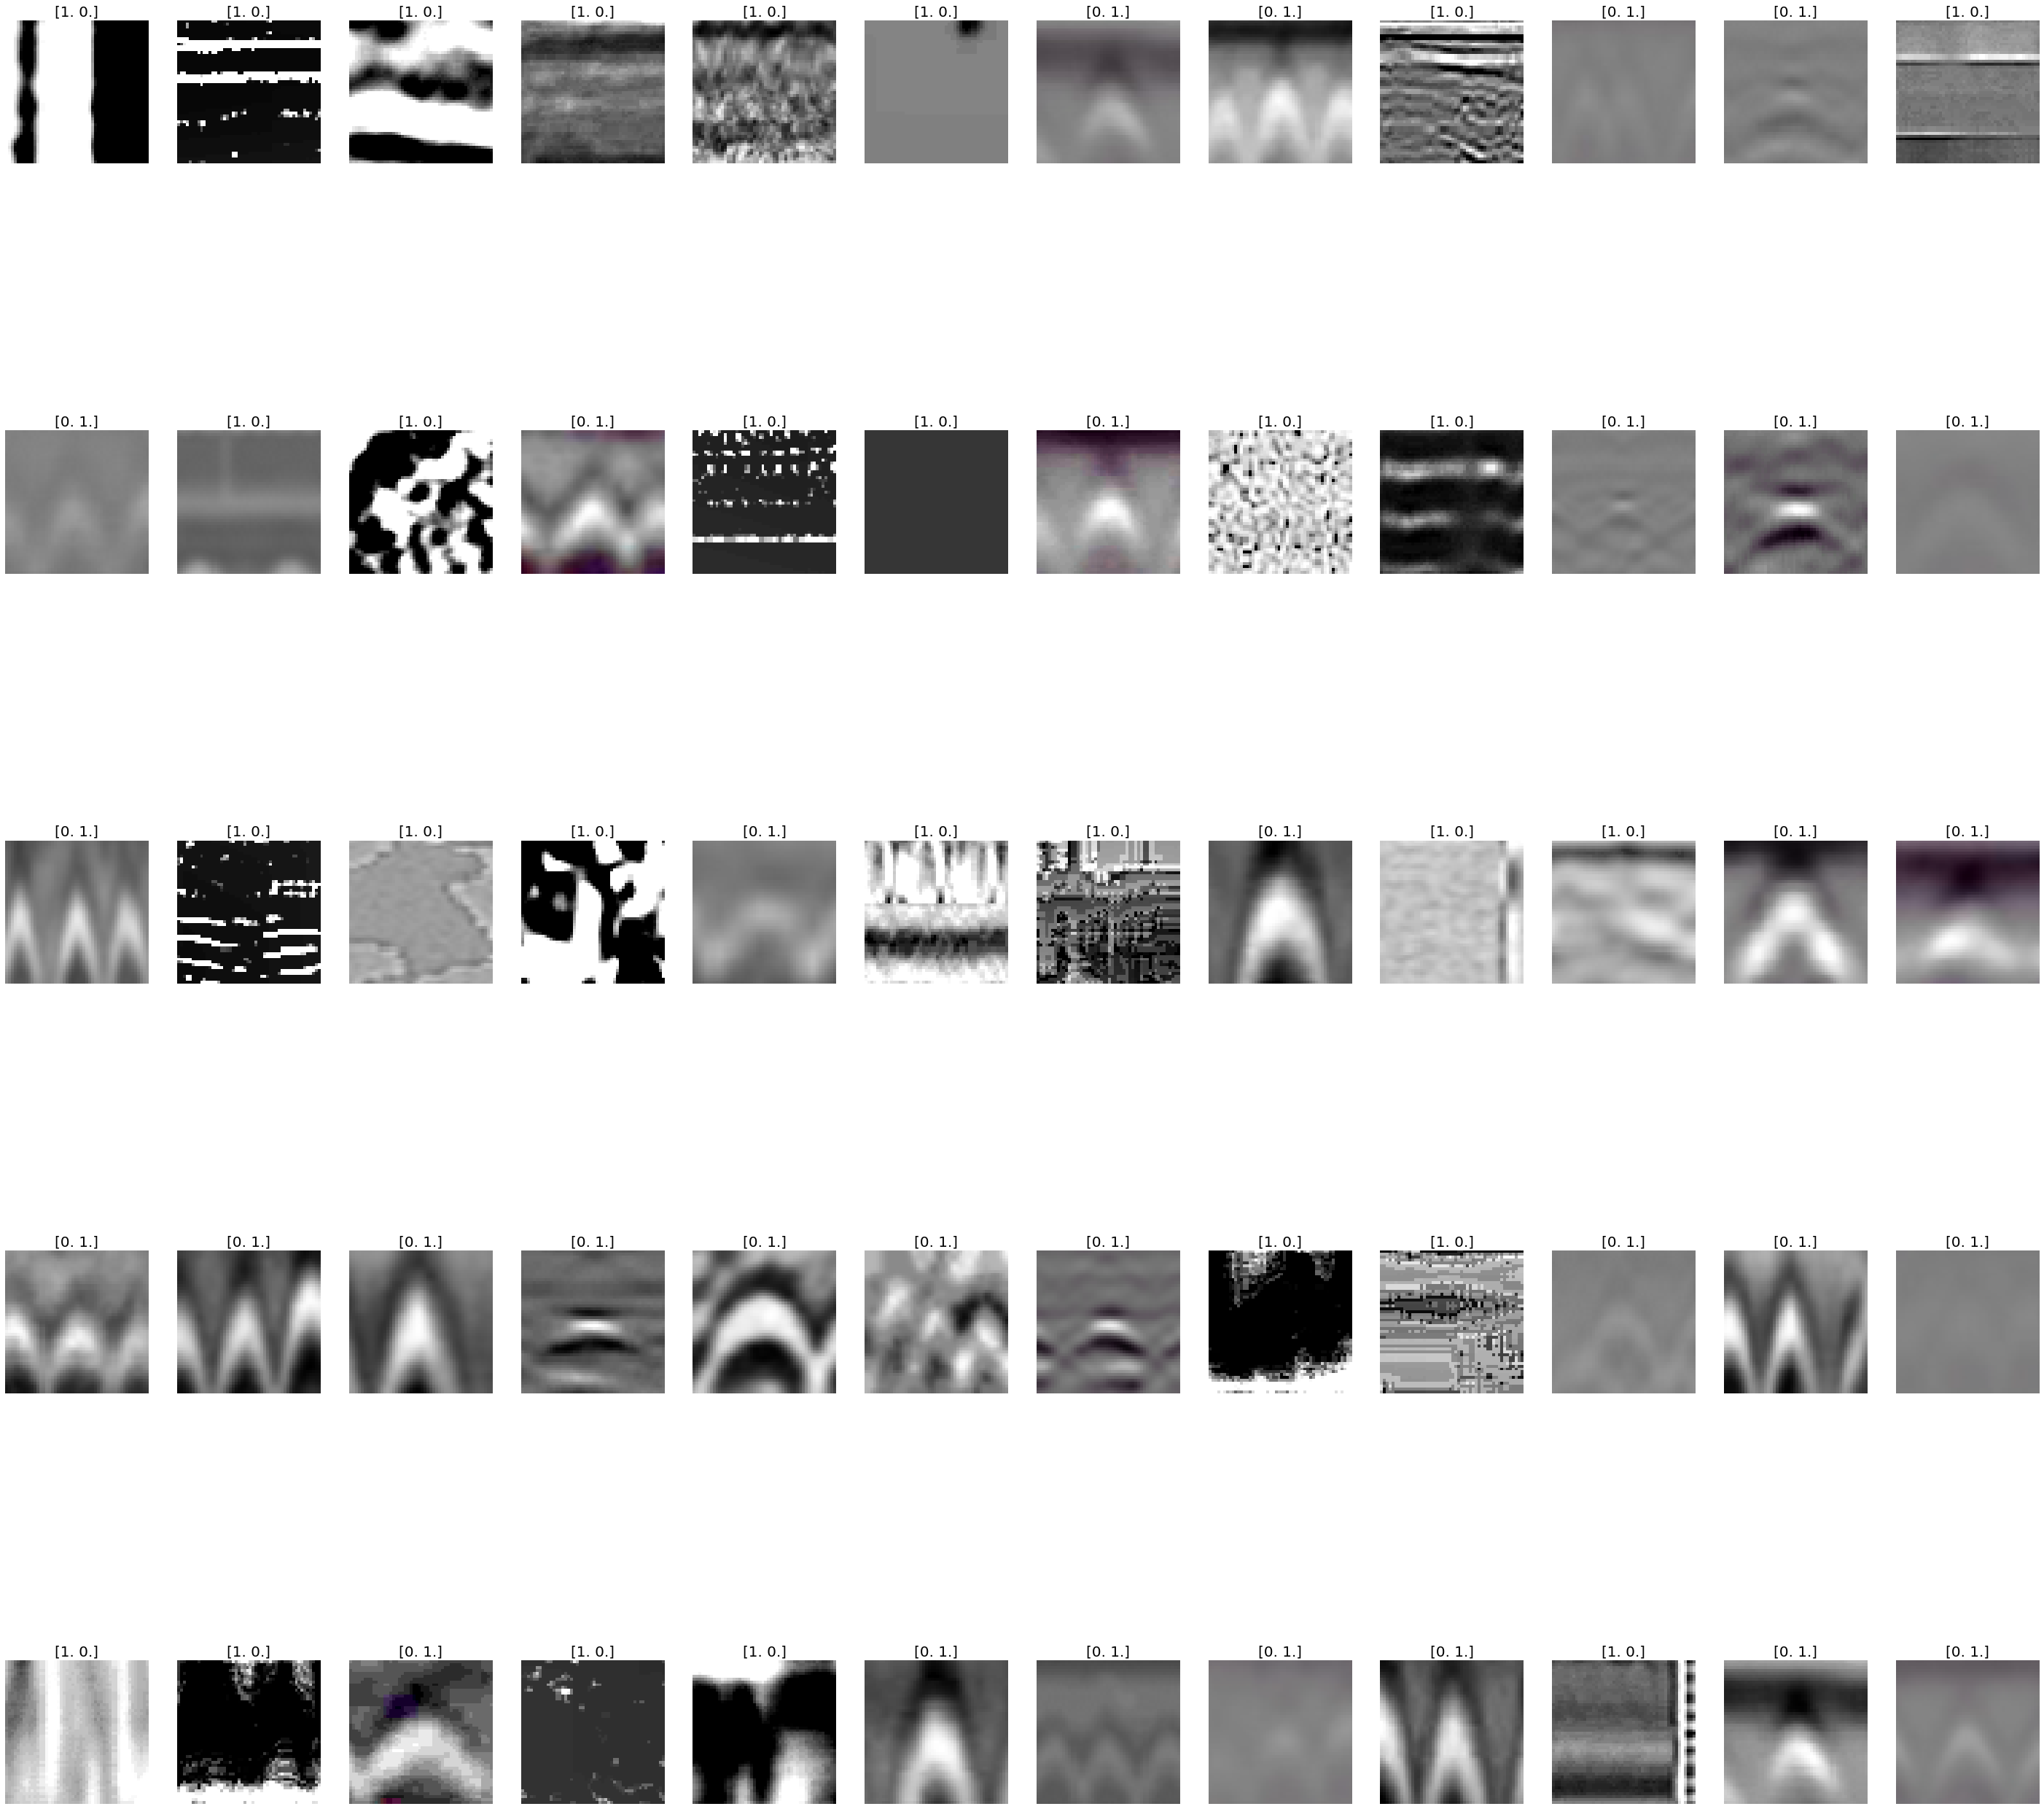

In [58]:
# this is actually encording
plots(imgs,rows=5,titles = test_labels)
print('checked')


In [59]:
test_labels = test_labels[0:37]
test_labels
# print(imgs, result[:,0])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Prediction

In [61]:
predictions = vgg16_model.predict_generator(train_batches,steps=25,verbose=1)

 1/25 [>.............................] - ETA: 2s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


25/25 [==============================] - 2s 78ms/step


In [62]:
predictions

array([[5.3532600e-01, 4.6467394e-01],
       [4.7343808e-01, 5.2656198e-01],
       [1.0000000e+00, 5.6142839e-17],
       ...,
       [7.8322750e-01, 2.1677253e-01],
       [4.4030002e-01, 5.5970001e-01],
       [4.2939985e-01, 5.7060009e-01]], dtype=float32)

In [63]:
import seaborn as sns
import sklearn.metrics as metrics

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

NameError: ignored

# ** code of confusion matrix**

In [64]:
cm = confusion_matrix(test_labels,predictions[:,0])

ValueError: ignored

In [66]:



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
  
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# *** confusion of test data***

# test set

In [67]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
print('checked')

checked


In [68]:
imgs,test_labels = next(test_batches)
print('checked')

checked


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


checked


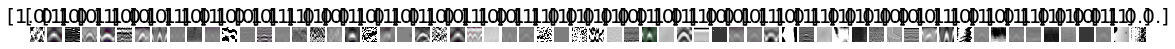

In [69]:
# this is actually encording
plots(imgs,titles = test_labels)
print('checked')

In [70]:
test_labels = test_labels[:,0]
test_labels
# print(imgs, result[:,0])

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.], dtype=float32)

In [ ]:
test_batches =  ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['black_measles','black_rot','healthy','leaf_blight'], batch_size=20)

# #Preductions

In [ ]:
predictions = vgg16_model.predict_generator(test_batches,steps=1,verbose=0)

In [ ]:
predictions

# **Calculate and plot confusion matrix:**

In [ ]:
import itertools

In [ ]:
# def plot_confusion_matrix(cm, classes, figname, normalize=False,
#                           cmap=plt.cm.Blues):
#   if normalize:
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#     print('Normalized confusion matrix')
#   else:
#     print('Confusion matrix, without normalization')
#   plt.figure(figsize=(8,8))
#   plt.title('Confusion Matrix')
#   tick_marks = np.arange(len(classes))
#   plt.xticks(tick_marks, classes, rotation=90)
#   plt.yticks(tick_marks, classes)
#   fmt = '.2f' if normalize else 'd'
#   thresh = cm.max() / 2.
#   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, format(cm[i, j], fmt),
#              horizontalalignment='center',
#              color='white' if cm[i, j] > thresh else 'black')
    
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')
#   plt.tight_layout()
#   plt.savefig(figname)




In [ ]:
# test_img, test_labells = next(test_batches)

In [ ]:
# Y_pred = vgg16_model.predict_generator(test_batches)
# y_pred = np.argmax(Y_pred, axis=1)

# cm = confusion_matrix(test_batches.classes, y_pred)
# plot_confusion_matrix(cm, classes = test_labels , normalize=False, figname = 'Confusion_matrix_concrete.jpg')

**Confusion matrix of testing data**

In [ ]:
# #Y_pred = model.predict_generator(test_generator)
# from keras.utils import to_categorical
# #One Hot Encoding
# x_test=to_categorical(test_batches.classes)


# Y_pred = vgg16_model.predict_generator(test_batches)
# y_test=to_categorical(Y_pred)

# y_pred = np.argmax(Y_pred, axis=1)

# cm = confusion_matrix(x_test, y_pred)
# plot_confusion_matrix(cm, classes = test_labels, title='Confusion Matrix of vgg16_model', normalize=False)

In [ ]:



# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')
  
#     print(cm)

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

# *** confusion of test data***

In [ ]:
test_img, test_labells = next(test_batches)

plots(test_img, titles=test_labells )
print(test_labells)

In [ ]:
predictions = vgg16_model.predict_generator(test_batches,steps=1,verbose=0)

In [ ]:
x_test=to_categorical(test_labells)
print(x_test)

In [ ]:


y_pred=vgg16_model.predict_classes(test_batches, verbose = 1)
y_true=np.argmax(test_labells,axis=1)

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

In [ ]:
#Plotting normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, normalize = True, title = 'Normalized confusion matrix')

confusion matrix of VGG19 

In [ ]:
test_labels

In [ ]:
Training accuracy of fine-tuned vgg19  model is     :    99.34584498405457 %
Validation  accuracy of fine-tuned vgg19  model is  :    95.41962742805481 %
training   loss of fine-tuned vgg19  model   is     :    3.6343192487354306 %
Validation  loss of fine-tuned vgg1  model  is     :    17.331895232200623 %

#  Compare the accuracy of VGG16 and VGG19

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = [ "vgg16" , "vgg19"]
Traning_loss = [3.6,3.6]
Traning_accuracy  = [99.4,99.3]
Valadation_loss= [16.3, 17.3]
Valadation_accuracy = [95.8,95.4]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x +0.0, Traning_loss, width, label='Traning_loss', color = "r")
rects2 = ax.bar(x + 0.25, Traning_accuracy, width, label='Traning_accuracy',color = "b")
rects3 = ax.bar(x + 0.50, Valadation_loss, width, label='Valadation_loss', color = "orange")
rects4 = ax.bar(x +  0.75, Valadation_accuracy, width, label='Valadation_accuracy', color = "g")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage %')
ax.set_title('Camparsion of VGG16 and VGG19')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()